In [1]:
import pandas as pd
import numpy as np
d=pd.read_csv("kdd_train.csv")

In [2]:
d["labels"] = d["labels"].replace(['neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], 'attack')

In [3]:
d["labels"].unique()

array(['normal', 'attack'], dtype=object)

In [4]:
x = d.iloc[:, :-1].values
y = d.iloc[:, 41].values

In [5]:
#encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#first applying label encoding to convert strings to number.
#display(x[:,2])
labelencoder_x_1 = LabelEncoder()
labelencoder_x_2 = LabelEncoder()
labelencoder_x_3 = LabelEncoder()
x[:, 1] = labelencoder_x_1.fit_transform(x[:, 1])
x[:, 2] = labelencoder_x_2.fit_transform(x[:, 2])
x[:, 3] = labelencoder_x_3.fit_transform(x[:, 3])

In [6]:
display(set(y))

{'attack', 'normal'}

In [7]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

In [12]:
import numpy as np
def PCA_C(X,num_components):

  #step-1
  X_meaned=X-np.mean(X,axis=0)

  #step-2
  cov_mat=np.cov(X_meaned,rowvar=False)

  # step-3 eigen values,eigen vectors
  eigen_values,eigen_vectors=np.linalg.eigh(cov_mat)

  #step-4 sort the eigen values indescending order
  sorted_index=np.argsort(eigen_values)[::-1]
  sorted_eigenvalue=eigen_values[sorted_index]
  sorted_eigenvectors=eigen_vectors[:,sorted_index]

  #step-5
  eigenvector_subset=sorted_eigenvectors[:,0:num_components]

  #step-6
  X_reduced=np.dot(eigenvector_subset.transpose(),X_meaned.transpose()).transpose()

  return X_reduced

In [13]:
import pandas as pd
mat_reduced=PCA_C(x,2)
principal__x=pd.DataFrame(mat_reduced,columns=['PC1','PC2'])

In [14]:
principal__x=pd.concat([principal__x,pd.DataFrame(y)],axis=1)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

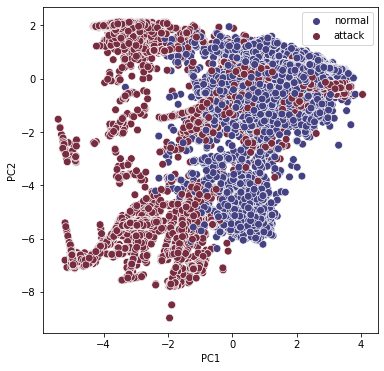

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
sns.scatterplot(data=principal__x,x='PC1',y='PC2',hue=y,s=60,palette='icefire')